In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
def confusion_matrix_map(y_true, y_preds):
    sns.heatmap(confusion_matrix(y_true,y_preds))
    
def classification_report_(y_true, y_preds):
    print(classification_report(y_true, y_preds))

In [ ]:
data = pd.read_csv('./dataset/qualifier_subset.csv')

In [ ]:
data.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Mathematics,Percentage in Communication skills,hackathons,self-learning capability?,certifications,interested career area,Type of company want to settle in?,Management or Technical,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,84,61,0,yes,shell programming,system developer,Web Services,Management,yes,no,Database Administrator
1,78,62,73,60,71,84,91,1,no,machine learning,Business process analyst,SAaS services,Technical,no,yes,Project Manager
2,71,86,91,87,61,72,94,4,no,app development,developer,Sales and Marketing,Management,no,yes,Project Manager
3,76,87,60,84,89,88,69,1,yes,python,testing,Testing and Maintainance Services,Management,yes,yes,Security Administrator
4,92,62,90,67,71,71,73,4,no,app development,testing,product development,Management,yes,yes,Business Intelligence Analyst


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Mathematics                 20000 non-null  int64 
 6   Percentage in Communication skills        20000 non-null  int64 
 7   hackathons                                20000 non-null  int64 
 8   self-learning capability?                 20000 non-null  object
 9   certifications                            20000 non-null  object
 10  interested career area                    2000

In [ ]:
cat_df = data.select_dtypes(include=['object'])
cat_feats = cat_df.columns.drop('Suggested Job Role')

In [ ]:
print('Unique values of categorical features')
for cat in cat_df.columns:
    print(cat,':',cat_df[cat].nunique())

Unique values of categorical features
self-learning capability? : 2
certifications : 9
interested career area  : 6
Type of company want to settle in? : 10
Management or Technical : 2
worked in teams ever? : 2
Introvert : 2
Suggested Job Role : 6


### Exploring Categorical Features

In [ ]:
data['self-learning capability?'].value_counts()

yes    10102
no      9898
Name: self-learning capability?, dtype: int64

In [ ]:
data['certifications'].value_counts()

r programming           2275
machine learning        2255
shell programming       2252
information security    2250
full stack              2239
hadoop                  2210
python                  2198
app development         2165
distro making           2156
Name: certifications, dtype: int64

In [ ]:
data['interested career area '].value_counts()

NameError: name 'data' is not defined

In [ ]:
data['Type of company want to settle in?'].value_counts()

BPA                                  2073
Testing and Maintainance Services    2053
Service Based                        2020
Web Services                         2005
Product based                        1998
Cloud Services                       1996
Finance                              1975
SAaS services                        1972
product development                  1958
Sales and Marketing                  1950
Name: Type of company want to settle in?, dtype: int64

In [ ]:
data['Management or Technical'].value_counts()

Technical     10047
Management     9953
Name: Management or Technical, dtype: int64

In [ ]:
data['worked in teams ever?'].value_counts()

no     10054
yes     9946
Name: worked in teams ever?, dtype: int64

In [ ]:
data['Introvert'].value_counts()

yes    10097
no      9903
Name: Introvert, dtype: int64

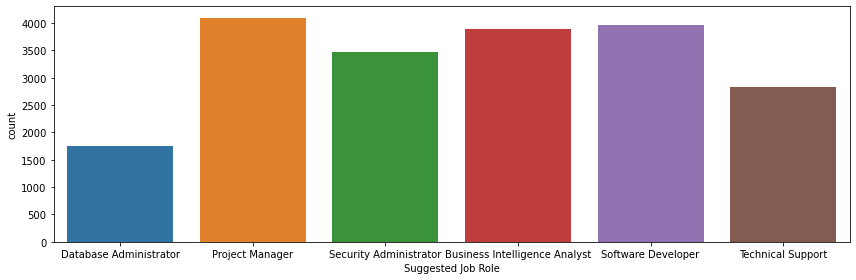

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(data['Suggested Job Role'])
plt.tight_layout();

#### Explore Numerical Columns

In [1]:
num_df = data.select_dtypes(exclude=['object'])
num_feats = num_df.columns


NameError: name 'data' is not defined

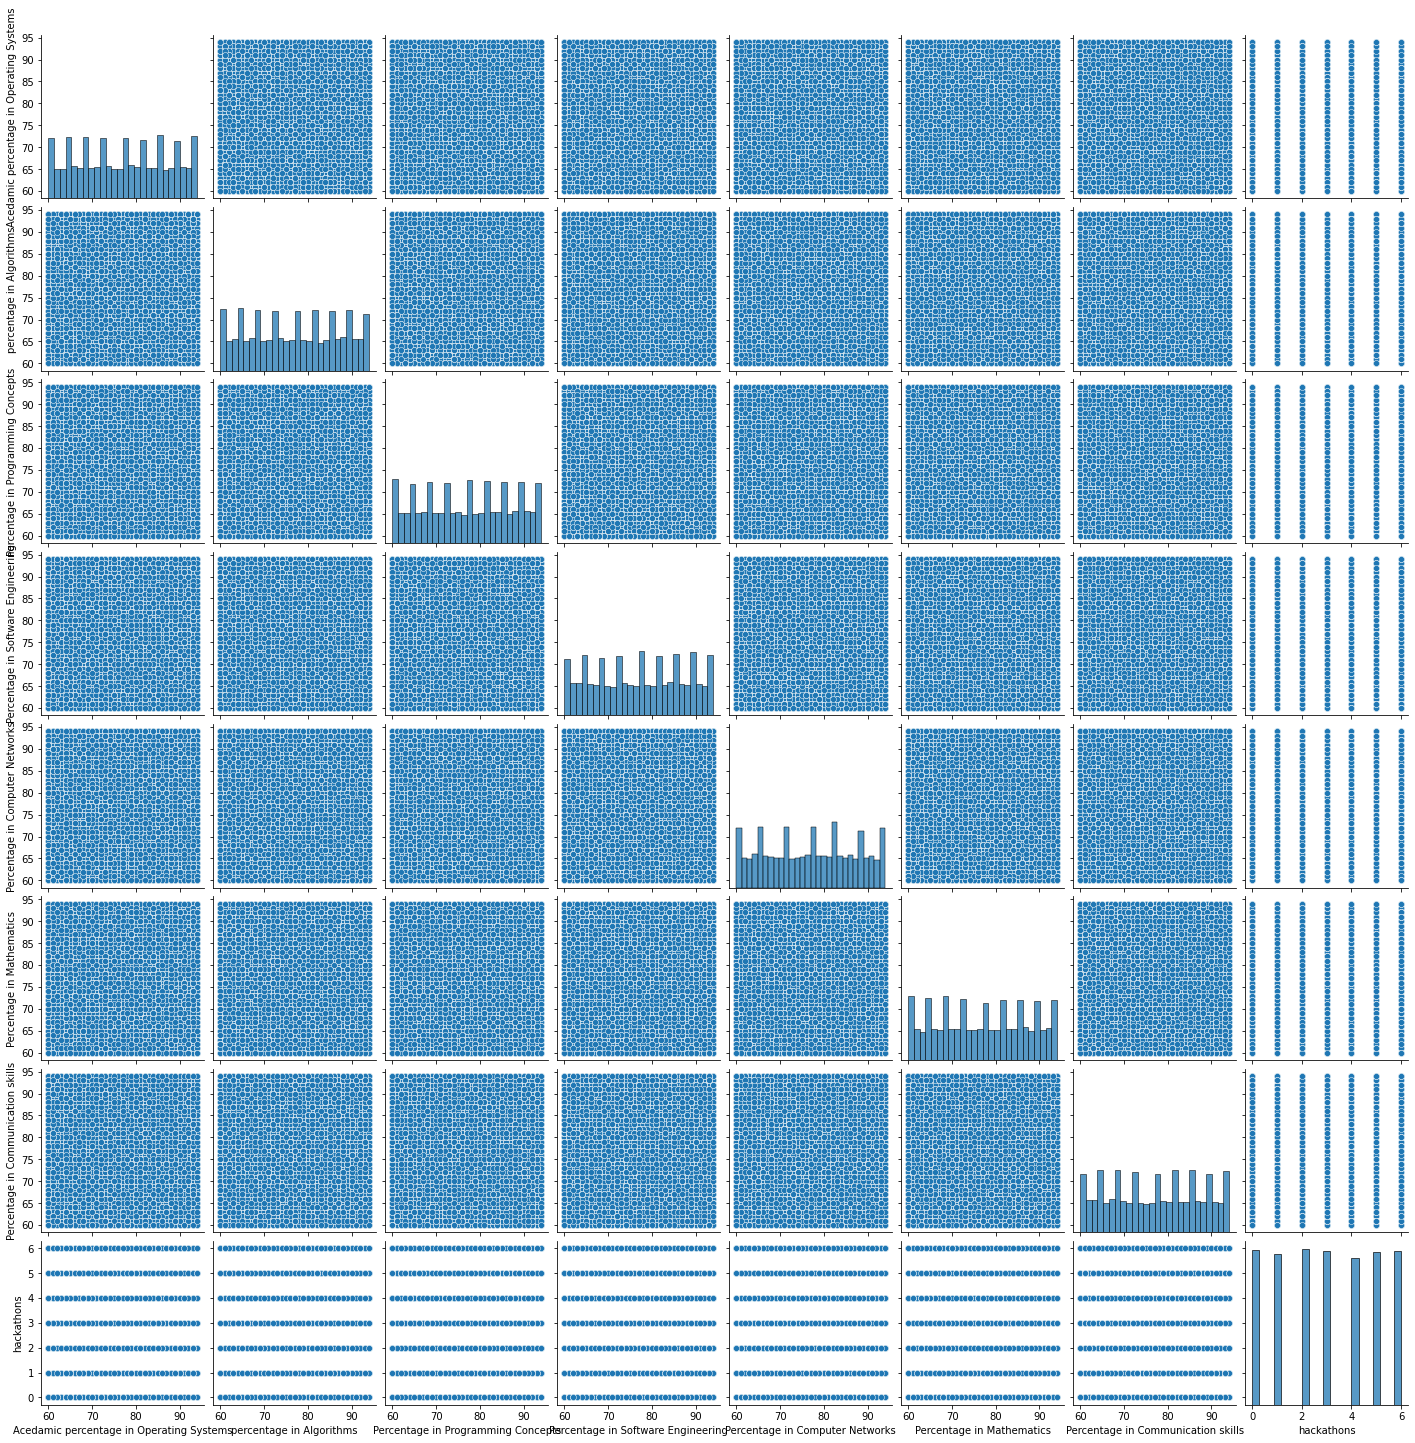

In [ ]:
sns.pairplot(num_feats)

In [ ]:
num_feats.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Mathematics,Percentage in Communication skills,hackathons
0,69,63,78,87,94,84,61,0
1,78,62,73,60,71,84,91,1
2,71,86,91,87,61,72,94,4
3,76,87,60,84,89,88,69,1
4,92,62,90,67,71,71,73,4


### Data Preprocessing

In [ ]:
## Seperate the test set before preprocesing
train, test, train_y, test_y = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.25, 
                                                random_state=45)

In [ ]:
cat_df.head()

,self-learning capability?,certifications,interested career area,Type of company want to settle in?,Management or Technical,worked in teams ever?,Introvert,Suggested Job Role
0,yes,shell programming,system developer,Web Services,Management,yes,no,Database Administrator
1,no,machine learning,Business process analyst,SAaS services,Technical,no,yes,Project Manager
2,no,app development,developer,Sales and Marketing,Management,no,yes,Project Manager
3,yes,python,testing,Testing and Maintainance Services,Management,yes,yes,Security Administrator
4,no,app development,testing,product development,Management,yes,yes,Business Intelligence Analyst


In [ ]:
train[cat_feats]

,self-learning capability?,certifications,interested career area,Type of company want to settle in?,Management or Technical,worked in teams ever?,Introvert
11980,yes,machine learning,testing,Service Based,Management,no,yes
18849,no,hadoop,testing,Testing and Maintainance Services,Management,no,yes
15260,no,machine learning,system developer,Testing and Maintainance Services,Technical,no,yes
4826,no,information security,testing,Product based,Technical,yes,yes
8751,no,information security,security,Product based,Management,no,no
...,...,...,...,...,...,...,...
16547,no,python,security,Cloud Services,Technical,no,no
16317,yes,r programming,security,Finance,Technical,no,no
12895,yes,app development,security,product development,Technical,yes,yes
6012,yes,machine learning,Business process analyst,Testing and Maintainance Services,Management,yes,no


In [ ]:
def concat(base, dummied):
    dummied.index = base.index
    data = pd.concat([base, dummied], axis=1)
    return data

In [ ]:
onehot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   x0_yes                                15000 non-null  float64
 1   x1_distro making                      15000 non-null  float64
 2   x1_full stack                         15000 non-null  float64
 3   x1_hadoop                             15000 non-null  float64
 4   x1_information security               15000 non-null  float64
 5   x1_machine learning                   15000 non-null  float64
 6   x1_python                             15000 non-null  float64
 7   x1_r programming                      15000 non-null  float64
 8   x1_shell programming                  15000 non-null  float64
 9   x2_cloud computing                    15000 non-null  float64
 10  x2_developer                          15000 non-null  float64
 11  x2_security    

In [ ]:
train[num_feats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 11980 to 6558
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Acedamic percentage in Operating Systems  15000 non-null  int64
 1   percentage in Algorithms                  15000 non-null  int64
 2   Percentage in Programming Concepts        15000 non-null  int64
 3   Percentage in Software Engineering        15000 non-null  int64
 4   Percentage in Computer Networks           15000 non-null  int64
 5   Percentage in Mathematics                 15000 non-null  int64
 6   Percentage in Communication skills        15000 non-null  int64
 7   hackathons                                15000 non-null  int64
dtypes: int64(8)
memory usage: 1.0 MB


### Buiding Logistic Regressio Model on different subset of the data

In [ ]:
# Seperate Train and Valiadtion set
X = train[num_feats]
y = train_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

log_model = LogisticRegression()

# train on only numberical features

log_model.fit(X_train, y_train)
y_preds = log_model.predict(X_test)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

                               precision    recall  f1-score   support

Business Intelligence Analyst       0.19      0.26      0.22       596
       Database Administrator       0.00      0.00      0.00       286
              Project Manager       0.20      0.50      0.29       607
       Security Administrator       0.00      0.00      0.00       510
           Software Developer       0.19      0.22      0.20       602
            Technical Support       0.00      0.00      0.00       399

                     accuracy                           0.20      3000
                    macro avg       0.10      0.16      0.12      3000
                 weighted avg       0.12      0.20      0.14      3000

Classification Report: None


In [ ]:
# Scaling the data using standard scaler
# Seperate Train and Valiadtion set
X = train[num_feats]
y = train_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

log_model = LogisticRegression()

# train on only numberical features

log_model.fit(X_train_s, y_train)
y_preds = log_model.predict(X_test_s)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.18      0.24      0.21       596
       Database Administrator       0.00      0.00      0.00       286
              Project Manager       0.20      0.50      0.29       607
       Security Administrator       0.00      0.00      0.00       510
           Software Developer       0.19      0.25      0.22       602
            Technical Support       0.00      0.00      0.00       399

                     accuracy                           0.20      3000
                    macro avg       0.10      0.16      0.12      3000
                 weighted avg       0.12      0.20      0.14      3000



In [ ]:
# Scaling the data using MinMax scaler
# Seperate Train and Valiadtion set
X = train[num_feats]
y = train_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

log_model = LogisticRegression()

# train on only numberical features

log_model.fit(X_train_s, y_train)
y_preds = log_model.predict(X_test_s)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.19      0.24      0.21       596
       Database Administrator       0.00      0.00      0.00       286
              Project Manager       0.20      0.50      0.29       607
       Security Administrator       0.00      0.00      0.00       510
           Software Developer       0.19      0.25      0.22       602
            Technical Support       0.00      0.00      0.00       399

                     accuracy                           0.20      3000
                    macro avg       0.10      0.16      0.12      3000
                 weighted avg       0.12      0.20      0.14      3000



In [ ]:
# building model base on cat features
# Seperate Train and Valiadtion set
X = train[cat_feats]
y = train_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train)
X_train_hot = pd.DataFrame(onehot.transform(X_train), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test), columns= onehot.get_feature_names())
log_model = LogisticRegression()

# train on only numberical features

log_model.fit(X_train_hot, y_train)
y_preds = log_model.predict(X_test_hot)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.20      0.24      0.22       596
       Database Administrator       0.00      0.00      0.00       286
              Project Manager       0.20      0.41      0.27       607
       Security Administrator       0.13      0.07      0.09       510
           Software Developer       0.20      0.25      0.22       602
            Technical Support       0.25      0.01      0.01       399

                     accuracy                           0.19      3000
                    macro avg       0.16      0.16      0.13      3000
                 weighted avg       0.18      0.19      0.16      3000



In [ ]:
# Buiding model base on all features

# Seperate Train and Valiadtion set
X = train.copy()
y = train_y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train_cat)
X_train_hot = pd.DataFrame(onehot.transform(X_train_cat), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test_cat), columns= onehot.get_feature_names())

X_train_all = concat(X_train_num, X_train_hot)
X_test_all = concat(X_test_num, X_test_hot)

log_model = LogisticRegression()

# train on only numberical features

log_model.fit(X_train_all, y_train)
y_preds = log_model.predict(X_test_all)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.20      0.24      0.22       596
       Database Administrator       0.00      0.00      0.00       286
              Project Manager       0.20      0.48      0.29       607
       Security Administrator       0.23      0.01      0.01       510
           Software Developer       0.17      0.24      0.20       602
            Technical Support       0.00      0.00      0.00       399

                     accuracy                           0.19      3000
                    macro avg       0.13      0.16      0.12      3000
                 weighted avg       0.15      0.19      0.14      3000



### Building Decision Tree Model


In [ ]:

# Buiding model base on all features

# Seperate Train and Valiadtion set
X = train.copy()
y = train_y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train_cat)
X_train_hot = pd.DataFrame(onehot.transform(X_train_cat), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test_cat), columns= onehot.get_feature_names())

X_train_all = concat(X_train_num, X_train_hot)
X_test_all = concat(X_test_num, X_test_hot)

tree_model = DecisionTreeClassifier()

# train on only numberical features

tree_model.fit(X_train_all, y_train)
y_preds = tree_model.predict(X_test_all)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.19      0.18      0.19       596
       Database Administrator       0.08      0.07      0.08       286
              Project Manager       0.19      0.20      0.20       607
       Security Administrator       0.19      0.19      0.19       510
           Software Developer       0.18      0.18      0.18       602
            Technical Support       0.12      0.13      0.13       399

                     accuracy                           0.17      3000
                    macro avg       0.16      0.16      0.16      3000
                 weighted avg       0.17      0.17      0.17      3000



## Random Forest Model

In [ ]:

# Buiding model base on all features

# Seperate Train and Valiadtion set
X = train.copy()
y = train_y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train_cat)
X_train_hot = pd.DataFrame(onehot.transform(X_train_cat), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test_cat), columns= onehot.get_feature_names())

X_train_all = concat(X_train_num, X_train_hot)
X_test_all = concat(X_test_num, X_test_hot)

rfc_model = RandomForestClassifier()

# train on only numberical features

rfc_model.fit(X_train_all, y_train)
y_preds = rfc_model.predict(X_test_all)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.21      0.27      0.24       596
       Database Administrator       0.17      0.00      0.01       286
              Project Manager       0.21      0.32      0.25       607
       Security Administrator       0.18      0.15      0.16       510
           Software Developer       0.19      0.24      0.21       602
            Technical Support       0.18      0.06      0.08       399

                     accuracy                           0.20      3000
                    macro avg       0.19      0.17      0.16      3000
                 weighted avg       0.19      0.20      0.18      3000



## XGBoost Model

In [ ]:

# Buiding model base on all features

# Seperate Train and Valiadtion set
X = train.copy()
y = train_y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train_cat)
X_train_hot = pd.DataFrame(onehot.transform(X_train_cat), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test_cat), columns= onehot.get_feature_names())

X_train_all = concat(X_train_num, X_train_hot)
X_test_all = concat(X_test_num, X_test_hot)

xgb_model = XGBClassifier()

# train on only numberical features

xgb_model.fit(X_train_all, y_train)
y_preds = xgb_model.predict(X_test_all)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

[22:38:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.21      0.22      0.21       596
       Database Administrator       0.08      0.02      0.03       286
              Project Manager       0.20      0.24      0.22       607
       Security Administrator       0.17      0.18      0.18       510
           Software Developer       0.19      0.22      0.20       602
            Technical Support       0.15      0.12      0.13       399

                     accuracy                           0.19      3000
                    macro avg       0.17      0.17      0.16      3000
        

### LGBM

In [ ]:

# Buiding model base on all features

# Seperate Train and Valiadtion set
X = train.copy()
y = train_y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train_cat)
X_train_hot = pd.DataFrame(onehot.transform(X_train_cat), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test_cat), columns= onehot.get_feature_names())

X_train_all = concat(X_train_num, X_train_hot)
X_test_all = concat(X_test_num, X_test_hot)

lgbm_model = LGBMClassifier()

# train on only numberical features

lgbm_model.fit(X_train_all, y_train)
y_preds = lgbm_model.predict(X_test_all)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Classification Report:
                               precision    recall  f1-score   support

Business Intelligence Analyst       0.22      0.25      0.23       596
       Database Administrator       0.17      0.02      0.04       286
              Project Manager       0.22      0.31      0.26       607
       Security Administrator       0.16      0.14      0.14       510
           Software Developer       0.21      0.26      0.23       602
            Technical Support       0.15      0.09      0.11       399

                     accuracy                           0.20      3000
                    macro avg       0.19      0.18      0.17      3000
                 weighted avg       0.19      0.20      0.19      3000



### CatBoost

In [ ]:

# Buiding model base on all features

# Seperate Train and Valiadtion set
X = train.copy()
y = train_y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

X_train_cat = X_train[cat_feats]
X_train_num = X_train[num_feats]

X_test_cat = X_test[cat_feats]
X_test_num = X_test[num_feats]

onehot = OneHotEncoder(sparse=False, drop='first')
onehot.fit(X_train_cat)
X_train_hot = pd.DataFrame(onehot.transform(X_train_cat), columns= onehot.get_feature_names())
X_test_hot = pd.DataFrame(onehot.transform(X_test_cat), columns= onehot.get_feature_names())

X_train_all = concat(X_train_num, X_train_hot)
X_test_all = concat(X_test_num, X_test_hot)

cat_model = CatBoostClassifier()

# train on only numberical features

cat_model.fit(X_train_all, y_train)
y_preds = cat_model.predict(X_test_all)

# print metrics
print('Classification Report:')
classification_report_(y_test, y_preds)

Learning rate set to 0.089818
0:	learn: 1.7859228	total: 532ms	remaining: 8m 51s
1:	learn: 1.7806366	total: 562ms	remaining: 4m 40s
2:	learn: 1.7754296	total: 598ms	remaining: 3m 18s
3:	learn: 1.7713083	total: 620ms	remaining: 2m 34s
4:	learn: 1.7683805	total: 632ms	remaining: 2m 5s
5:	learn: 1.7651471	total: 643ms	remaining: 1m 46s
6:	learn: 1.7618858	total: 656ms	remaining: 1m 33s
7:	learn: 1.7588287	total: 667ms	remaining: 1m 22s
8:	learn: 1.7556329	total: 678ms	remaining: 1m 14s
9:	learn: 1.7529068	total: 689ms	remaining: 1m 8s
10:	learn: 1.7505817	total: 701ms	remaining: 1m 3s
11:	learn: 1.7489409	total: 711ms	remaining: 58.5s
12:	learn: 1.7467154	total: 728ms	remaining: 55.3s
13:	learn: 1.7443992	total: 745ms	remaining: 52.5s
14:	learn: 1.7422282	total: 757ms	remaining: 49.7s
15:	learn: 1.7403728	total: 768ms	remaining: 47.2s
16:	learn: 1.7385635	total: 782ms	remaining: 45.2s
17:	learn: 1.7373112	total: 796ms	remaining: 43.4s
18:	learn: 1.7357995	total: 807ms	remaining: 41.7s
19:

The model Perfomance will need to be improved
* Seems like a problem with the data either from preprocesing or probably the selected features